# Explore here

In [1265]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [1266]:
# Basic information
print(df.shape)         # Dimensions of the dataset
print(df.info())        # Data types and non-null values

(1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [1267]:
print(df.columns)   

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [1268]:
df.describe()    # Summary statistics for numerical columns

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [1269]:
# Find total number of missing values each column left
missing_values = df.isnull().sum()
print(missing_values)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [1270]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(duplicates)


1


In [1271]:
#Remove duplicate rows and show new shape 
df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")


Shape after removing duplicates: (1337, 7)


In [1272]:
# Check the unique values in categorical columns
df['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [1273]:
df['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [1274]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

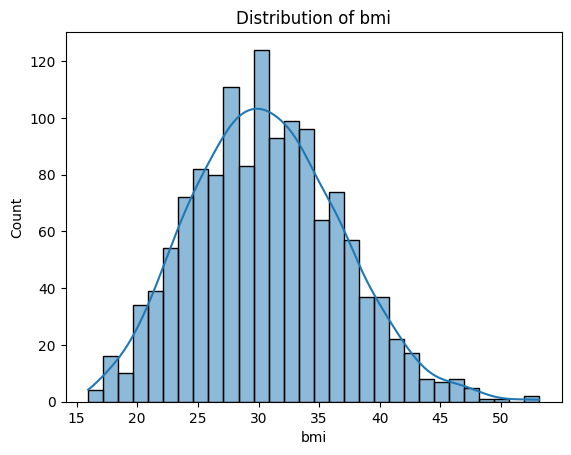

In [1275]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram for the 'Age' column
sns.histplot(df['bmi'], bins=30, kde=True)
plt.title('Distribution of bmi')
plt.show()

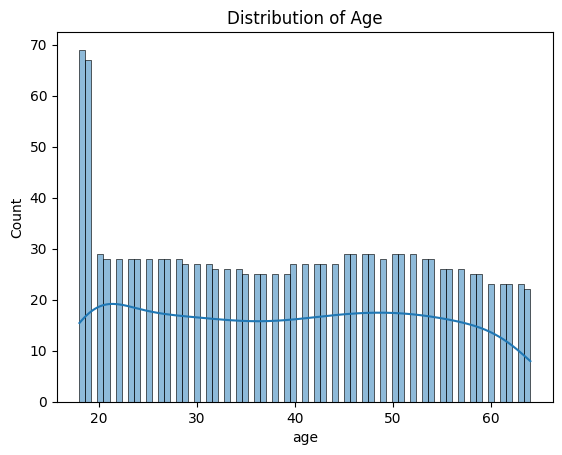

In [1276]:
# Histogram for age
sns.histplot(df['age'], bins=75, kde=True)
plt.title('Distribution of Age')
plt.show()

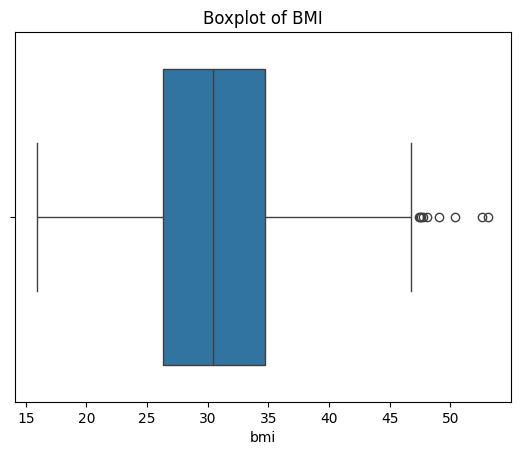

In [1277]:
# Boxplots for Outlier Detection
# Boxplot for BMI
sns.boxplot(x=df['bmi'])
plt.title('Boxplot of BMI')
plt.show()

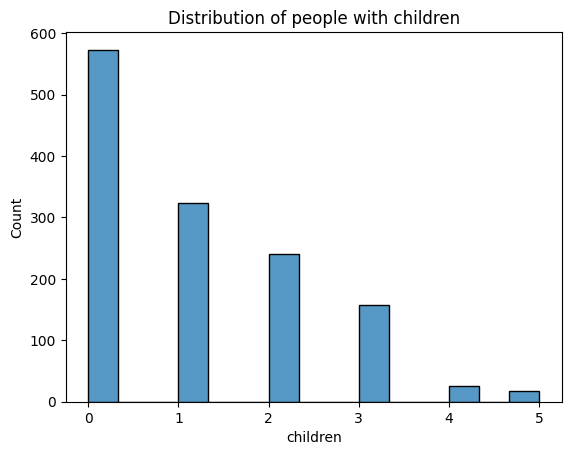

In [1278]:
# Distribution of people with children
sns.histplot(df['children'], bins=15)
plt.title('Distribution of people with children')
plt.show()

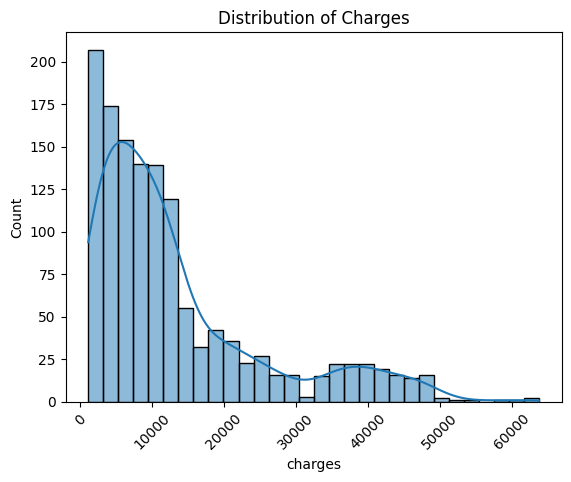

In [1279]:
# Distribution of Charges
sns.histplot(df['charges'], bins=30, kde=True)
plt.xticks(rotation=45)
plt.title('Distribution of Charges')
plt.show()

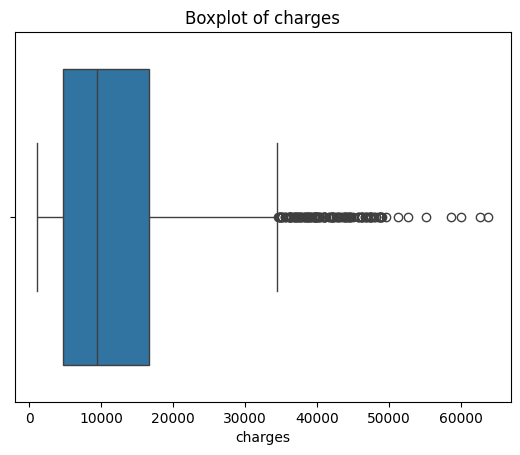

In [1280]:
# Boxplots for Outlier Detection
# Boxplot for Charges
sns.boxplot(x=df['charges'])
plt.title('Boxplot of charges')
plt.show()

In [1281]:
#Exploratory Data Analysis
df.shape

(1337, 7)

In [1282]:
df = df.drop_duplicates().reset_index(drop = True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [1283]:
#Eliminate Irrelevant Information
df = df.drop(['region'], axis=1)
df


,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1332,50,male,30.970,3,no,10600.54830
1333,18,female,31.920,0,no,2205.98080
1334,18,female,36.850,0,no,1629.83350
1335,21,female,25.800,0,no,2007.94500


In [1284]:
df.shape

(1337, 6)

In [1285]:
#Dropping Columns with Excessive Missing Values

# Calculate the total number of missing values for each column
missing_values = df.isnull().sum()

# Calculate the proportion of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Combine both into a DataFrame for better visualization
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data


,Missing Values,Percentage
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
charges,0,0.0


In [1286]:
#Defining a Threshold for Dropping Columns

# Define the threshold (e.g., 30%)
threshold = 30

# Drop columns where the percentage of missing values exceeds the threshold
columns_to_drop = missing_percentage[missing_percentage > threshold].index

# Drop those columns from the dataframe
df = df.drop(columns=columns_to_drop)

print(f"Following columns were dropped: {list(columns_to_drop)}")


Following columns were dropped: []


In [1287]:
# Confirming Column Removal

# Check the remaining columns after dropping
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 62.8+ KB


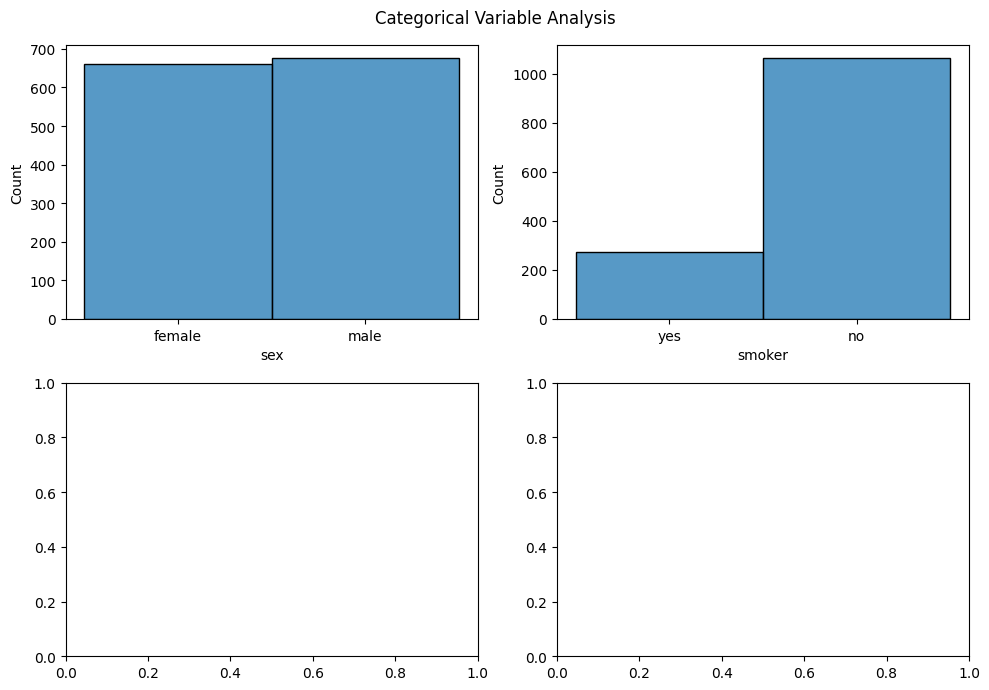

In [1288]:
#Analysis of Univariate Variables

#Categorical Variable Analysis

categorical_features = ['sex', 'smoker']

fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = df, x = "sex")
sns.histplot(ax = axis[0, 1], data = df, x = "smoker")

plt.suptitle("Categorical Variable Analysis")
plt.tight_layout()

# Show the plot
plt.show()

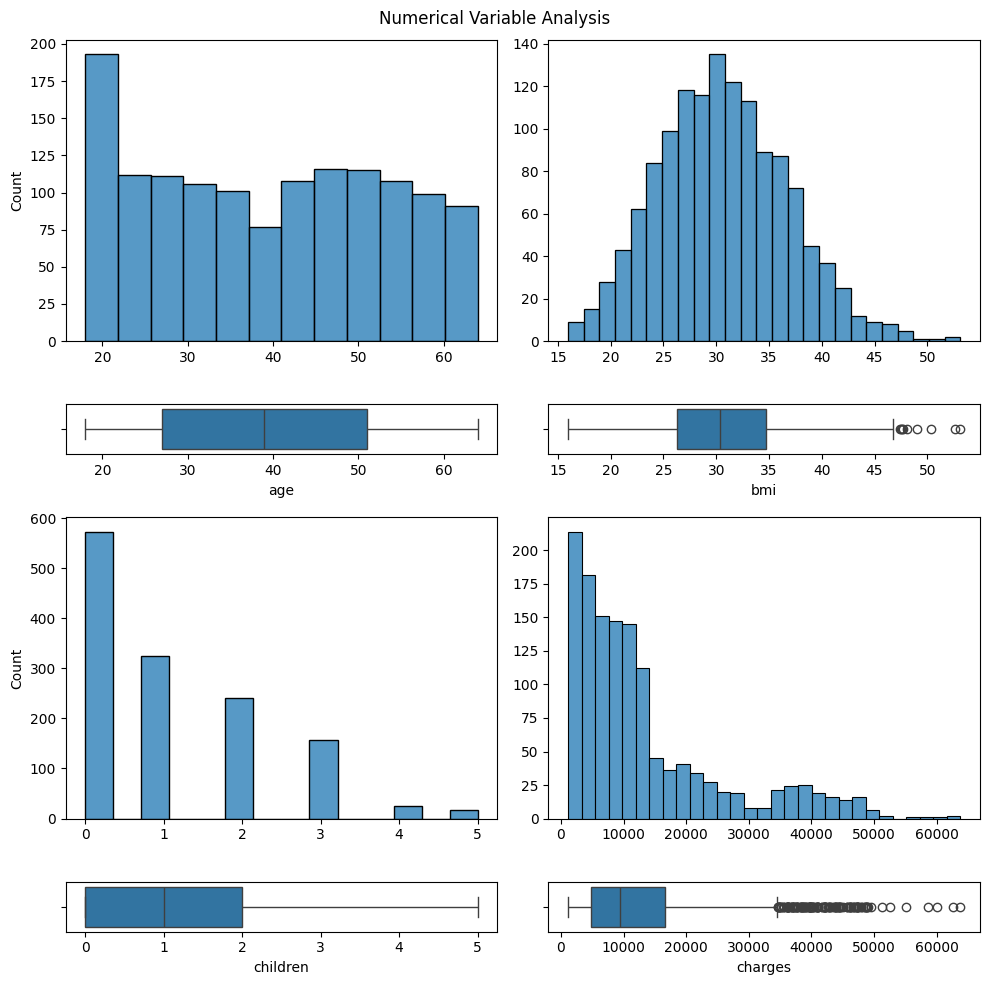

In [1289]:
#Numerical Variable Analysis

numerical_features = ['age', 'bmi', 'children', 'charges']

fig, axis = plt.subplots(4, 2, figsize = (10, 10), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = df, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "age")
sns.histplot(ax = axis[0, 1], data = df, x = "bmi").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "bmi")
sns.histplot(ax = axis[2, 0], data = df, x = "children").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = df, x = "children")
sns.histplot(ax = axis[2, 1], data = df, x = "charges").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = df, x = "charges")

plt.suptitle("Numerical Variable Analysis")
plt.tight_layout()

# Show the plot
plt.show()

In [1290]:
# Our numerical features
numerical_features

['age', 'bmi', 'children', 'charges']

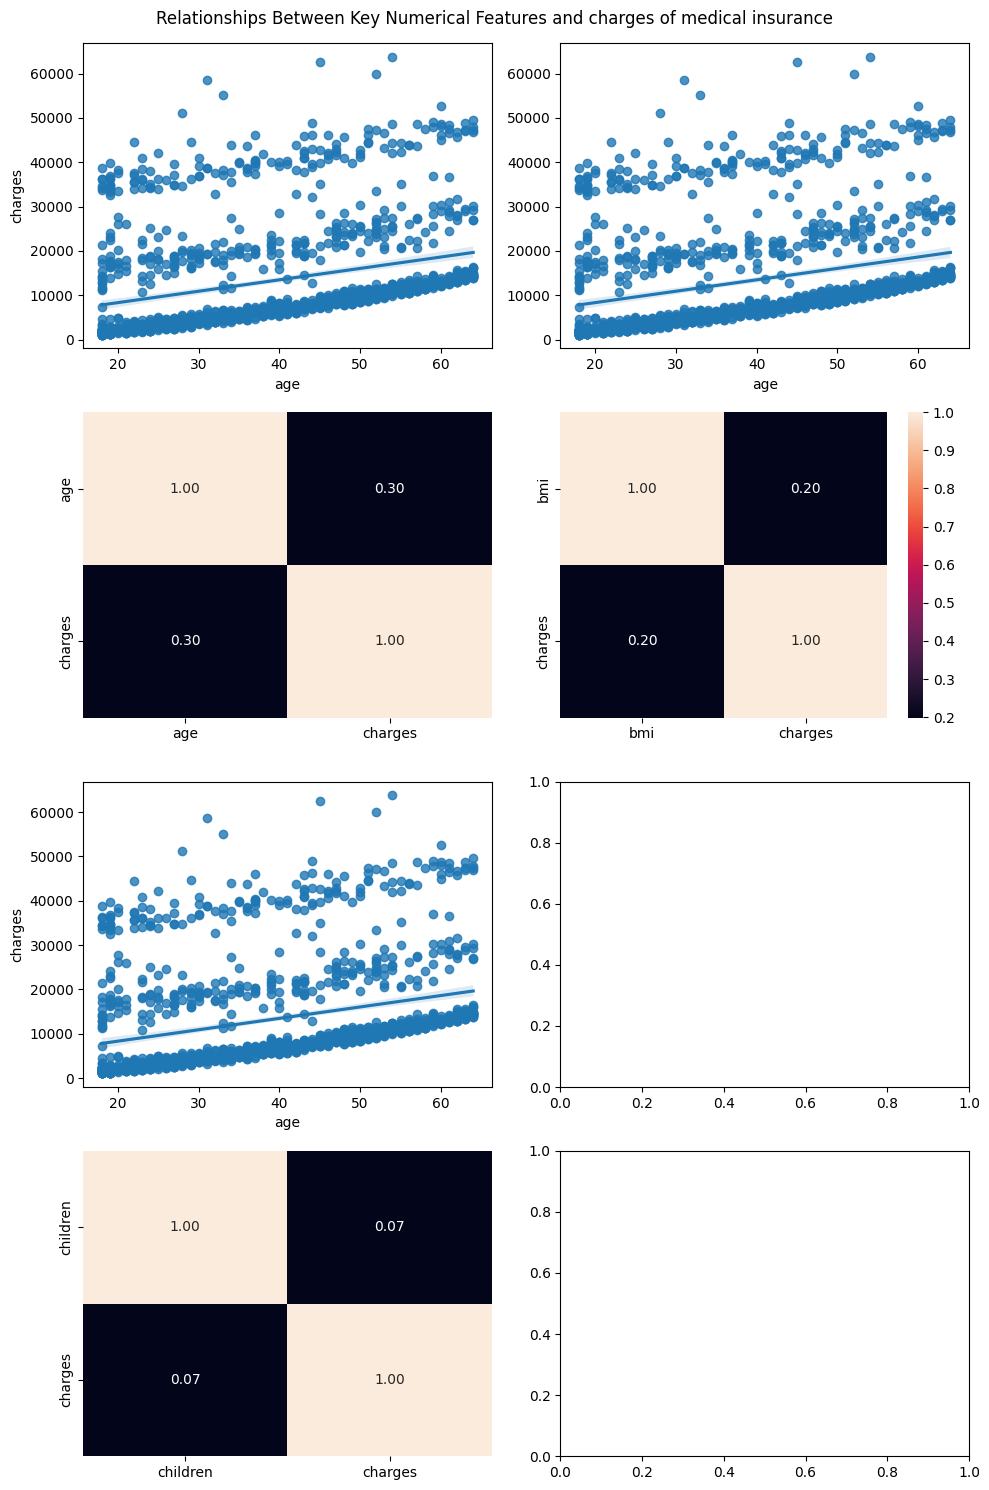

In [1291]:

fig, axis = plt.subplots(4, 2, figsize = (10, 15))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = df, x = "age", y = "charges")
sns.heatmap(df[["age", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "age", y = "charges").set(ylabel=None)
sns.heatmap(df[["bmi", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = df, x = "age", y = "charges")
sns.heatmap(df[["children", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar=False)


plt.suptitle("Relationships Between Key Numerical Features and charges of medical insurance", y=0.99)
plt.tight_layout()

# Show the plot
plt.show()

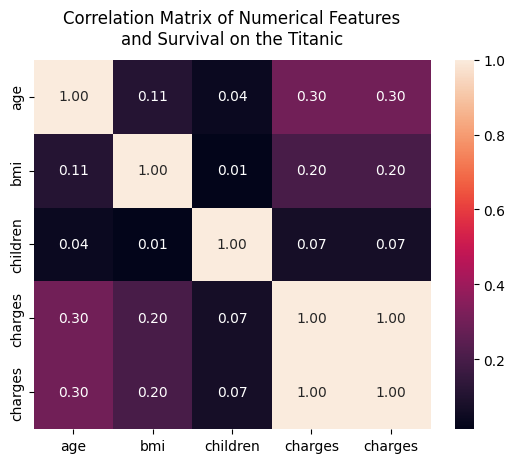

In [1292]:
#heatmap
sns.heatmap(df[numerical_features + ['charges']].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Matrix of Numerical Features\nand Survival on the Titanic", y=1.02)
plt.show()

In [1293]:
# Our categorical features
categorical_features

['sex', 'smoker']

In [1294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 62.8+ KB


In [1295]:
numerical_features

['age', 'bmi', 'children', 'charges']

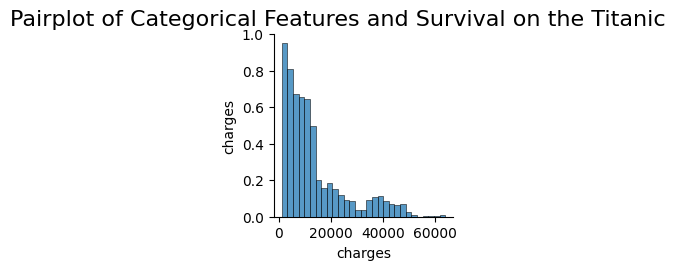

In [1296]:
# Warning! Pairplots can be slow!
# And not too useful for categorical data
sns.pairplot(data = df[categorical_features + ['charges']])
plt.suptitle("Pairplot of Categorical Features and Survival on the Titanic", y=1.04, fontsize=16)
plt.show()

In [1297]:
#Numerical-Categorical Analysis

print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

Numerical features: ['age', 'bmi', 'children', 'charges']
Categorical features: ['sex', 'smoker']


In [1298]:
from sklearn.model_selection import train_test_split 

X = df.drop("charges", axis = 1)
y = df["charges"]

In [1299]:
X.shape

(1337, 5)

In [1300]:
y.shape

(1337,)

In [1301]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1302]:
# Split 80% of data is train data

print(f"Total rows: {df.shape[0]}")
print(f"Dimensions of X_train: {X_train.shape}")
print(f"Dimensions of y_train: {y_train.shape}")
print(f"Proportion of train set: {X_train.shape[0]} / {df.shape[0]} = {X_train.shape[0]/df.shape[0]:.2f} = {X_train.shape[0]/df.shape[0]*100:.0f}%")

Total rows: 1337
Dimensions of X_train: (1069, 5)
Dimensions of y_train: (1069,)
Proportion of train set: 1069 / 1337 = 0.80 = 80%


In [1303]:
# Split 20% of data is train data

print(f"Total rows: {df.shape[0]}")
print(f"Dimensions of X_test: {X_test.shape}")
print(f"Dimensions of y_test: {y_test.shape}")
print(f"Proportion of test set: {X_test.shape[0]} / {df.shape[0]} = {X_test.shape[0]/df.shape[0]:.2f} = {X_test.shape[0]/df.shape[0]*100:.0f}%")

Total rows: 1337
Dimensions of X_test: (268, 5)
Dimensions of y_test: (268,)
Proportion of test set: 268 / 1337 = 0.20 = 20%


In [1304]:
print(X_train.head())

      age     sex     bmi  children smoker
1113   23    male  24.510         0     no
967    21    male  25.745         2     no
598    52  female  37.525         2     no
170    63    male  41.470         0     no
275    47  female  26.600         2     no


In [1305]:
X_train.describe()

,age,bmi,children
count,1069.000000,1069.000000,1069.000000
mean,39.198316,30.540426,1.084191
std,13.998594,6.051841,1.194723
min,18.000000,15.960000,0.000000
25%,27.000000,26.180000,0.000000
50%,39.000000,30.200000,1.000000
75%,51.000000,34.430000,2.000000
max,64.000000,53.130000,5.000000


In [1306]:
y_train.describe()

count     1069.000000
mean     13030.203369
std      11706.530971
min       1121.873900
25%       4747.052900
50%       9290.139500
75%      16450.894700
max      62592.873090
Name: charges, dtype: float64

In [1307]:
# pd.factorize() can factorize categorical features to make them numeric (e.g. {"male": 0, "female": 1})
X_train["sex_n"] = pd.factorize(X_train["sex"])[0]
X_train["smoker_n"] = pd.factorize(X_train["smoker"])[0]

In [1308]:
print(X_train.head())

      age     sex     bmi  children smoker  sex_n  smoker_n
1113   23    male  24.510         0     no      0         0
967    21    male  25.745         2     no      0         0
598    52  female  37.525         2     no      1         0
170    63    male  41.470         0     no      0         0
275    47  female  26.600         2     no      1         0


In [1309]:
# Drop original categorical columns
X_train.drop(["sex", "smoker"], axis=1, inplace=True)

In [1310]:
X_train.head(10)


,age,bmi,children,sex_n,smoker_n
1113,23,24.510,0,0,0
967,21,25.745,2,0,0
598,52,37.525,2,1,0
170,63,41.470,0,0,0
275,47,26.600,2,1,0
1140,41,32.600,3,1,0
209,40,41.230,1,0,0
342,60,27.550,0,1,0
140,34,22.420,2,0,0
926,57,20.100,1,1,0


In [1311]:
# pd.factorize() can factorize categorical features to make them numeric (e.g. {"male": 0, "female": 1})
X_test["sex_n"] = pd.factorize(X_test["sex"])[0]
X_test["smoker_n"] = pd.factorize(X_test["smoker"])[0]

In [1312]:
print(X_test.head())

      age     sex     bmi  children smoker  sex_n  smoker_n
899    49    male  22.515         0     no      0         0
1063   29  female  25.600         4     no      1         0
1255   51  female  36.385         3     no      1         0
298    31    male  34.390         3    yes      0         1
237    31    male  38.390         2     no      0         0


In [1313]:
# Drop original categorical columns
X_test.drop(["sex", "smoker"], axis=1, inplace=True)

In [1314]:
X_test.head(10)

,age,bmi,children,sex_n,smoker_n
899,49,22.515,0,0,0
1063,29,25.600,4,1,0
1255,51,36.385,3,1,0
298,31,34.390,3,0,1
237,31,38.390,2,0,0
481,49,37.510,2,0,0
240,23,36.670,2,1,1
277,22,24.300,0,1,0
415,43,35.640,1,1,0
706,49,28.690,3,0,0


In [1315]:
df.describe().loc[['mean', 'min', '25%', '75%', 'max']]


,age,bmi,children,charges
mean,39.222139,30.663452,1.095737,13279.121487
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


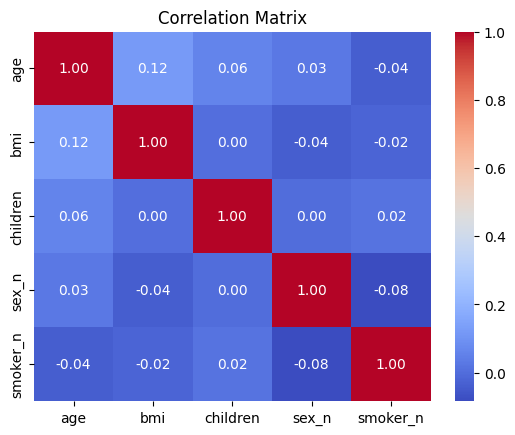

In [1316]:
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [1317]:
# Min-Max scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [1318]:
# Scale the training set
X_train_scaled = scaler.fit_transform(X_train)

# Scale the test set
X_test_scaled = scaler.transform(X_test)

In [1319]:
from sklearn.linear_model import LinearRegression

In [1320]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [1321]:
# Feature selection

selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,age,bmi,children,smoker_n
0,23.0,24.510,0.0,0.0
1,21.0,25.745,2.0,0.0
2,52.0,37.525,2.0,0.0
3,63.0,41.470,0.0,0.0
4,47.0,26.600,2.0,0.0


In [1322]:
X_train.shape

(1069, 5)

In [1323]:
y_train.shape

(1069,)

In [1324]:
print(X_train.describe())

               age          bmi     children        sex_n     smoker_n
count  1069.000000  1069.000000  1069.000000  1069.000000  1069.000000
mean     39.198316    30.540426     1.084191     0.485500     0.200187
std      13.998594     6.051841     1.194723     0.500024     0.400328
min      18.000000    15.960000     0.000000     0.000000     0.000000
25%      27.000000    26.180000     0.000000     0.000000     0.000000
50%      39.000000    30.200000     1.000000     0.000000     0.000000
75%      51.000000    34.430000     2.000000     1.000000     0.000000
max      64.000000    53.130000     5.000000     1.000000     1.000000


In [1325]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1069 entries, 1113 to 1126
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1069 non-null   int64  
 1   bmi       1069 non-null   float64
 2   children  1069 non-null   int64  
 3   sex_n     1069 non-null   int64  
 4   smoker_n  1069 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 50.1 KB
None


In [1326]:
# Find total number of missing values each column left
missing_values = X_train.isnull().sum()
print(missing_values)

age         0
bmi         0
children    0
sex_n       0
smoker_n    0
dtype: int64


In [1327]:
# Percentage of missing values
missing_percentages = (X_train.isnull().mean() * 100)
print(missing_percentages)  

age         0.0
bmi         0.0
children    0.0
sex_n       0.0
smoker_n    0.0
dtype: float64


In [1328]:
X_test_sel.head()

,age,bmi,children,smoker_n
0,49.0,22.515,0.0,0.0
1,29.0,25.600,4.0,0.0
2,51.0,36.385,3.0,0.0
3,31.0,34.390,3.0,1.0
4,31.0,38.390,2.0,0.0


In [1329]:
X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [1330]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,age,bmi,children,smoker_n,charges
0,23.0,24.510,0.0,0.0,2396.09590
1,21.0,25.745,2.0,0.0,3279.86855
2,52.0,37.525,2.0,0.0,33471.97189
3,63.0,41.470,0.0,0.0,13405.39030
4,47.0,26.600,2.0,0.0,9715.84100


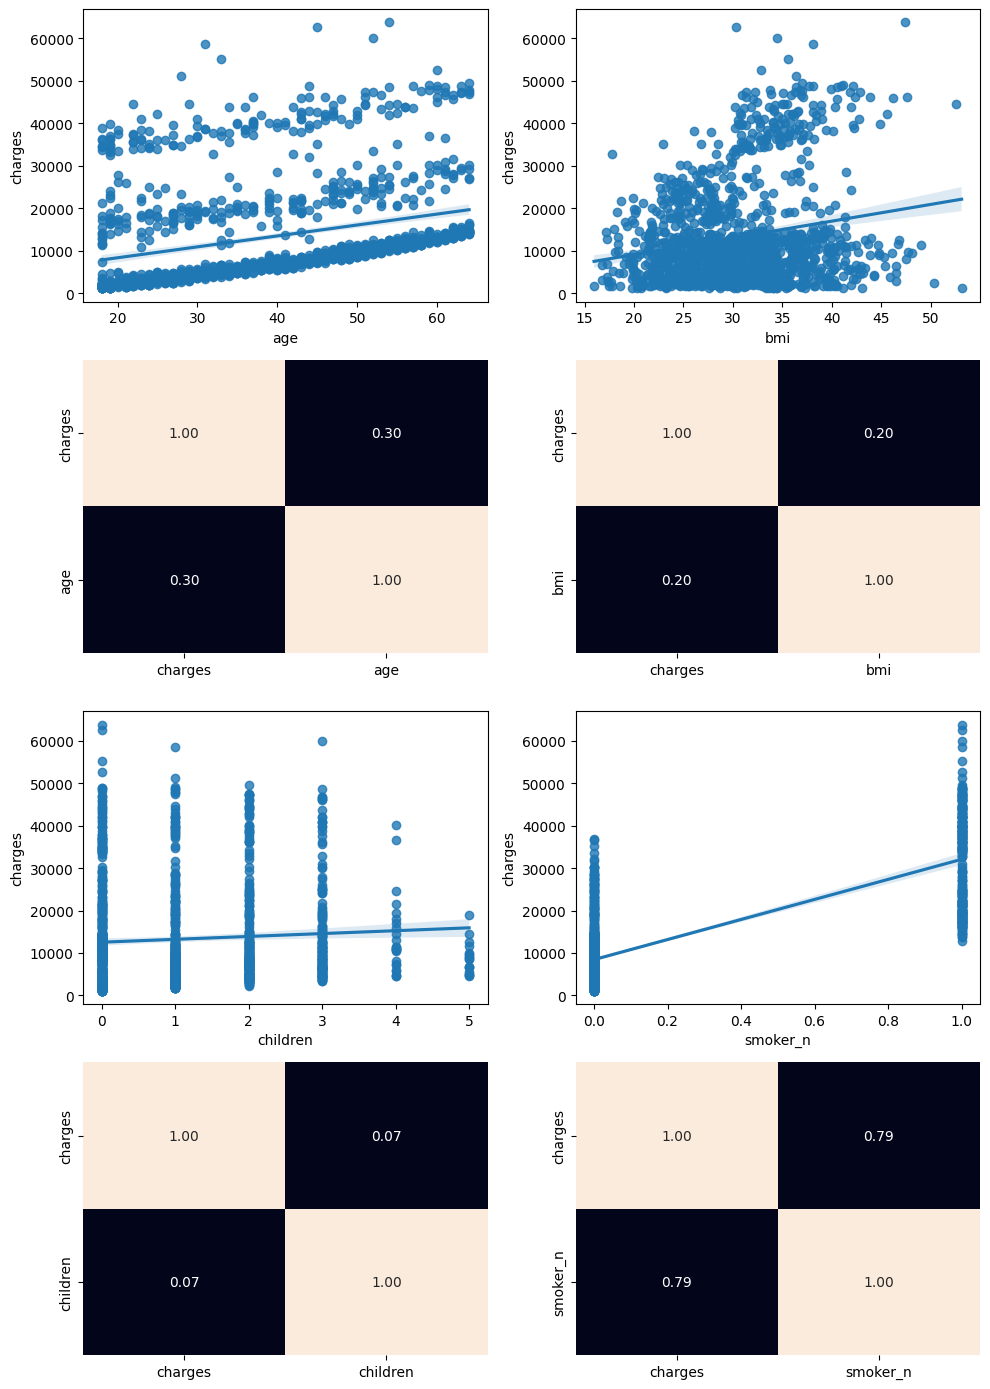

In [1331]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 2, figsize = (10, 14))
total_data = pd.concat([train_data, test_data])

sns.regplot(data = total_data, x = "age", y = "charges", ax = axis[0, 0])
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(data = total_data, x = "bmi", y = "charges", ax = axis[0, 1])
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(data = total_data, x = "children", y = "charges", ax = axis[2, 0])
sns.heatmap(total_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(data = total_data, x = "smoker_n", y = "charges", ax = axis[2, 1])
sns.heatmap(total_data[["charges", "smoker_n"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()
plt.show()

In [1332]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

In [1333]:
X_train.head()

,age,bmi,children,smoker_n
0,23.0,24.510,0.0,0.0
1,21.0,25.745,2.0,0.0
2,52.0,37.525,2.0,0.0
3,63.0,41.470,0.0,0.0
4,47.0,26.600,2.0,0.0


In [1334]:
# Reassigning Num_variables
num_variables = ["age", "bmi", "children", "smoker_n"]

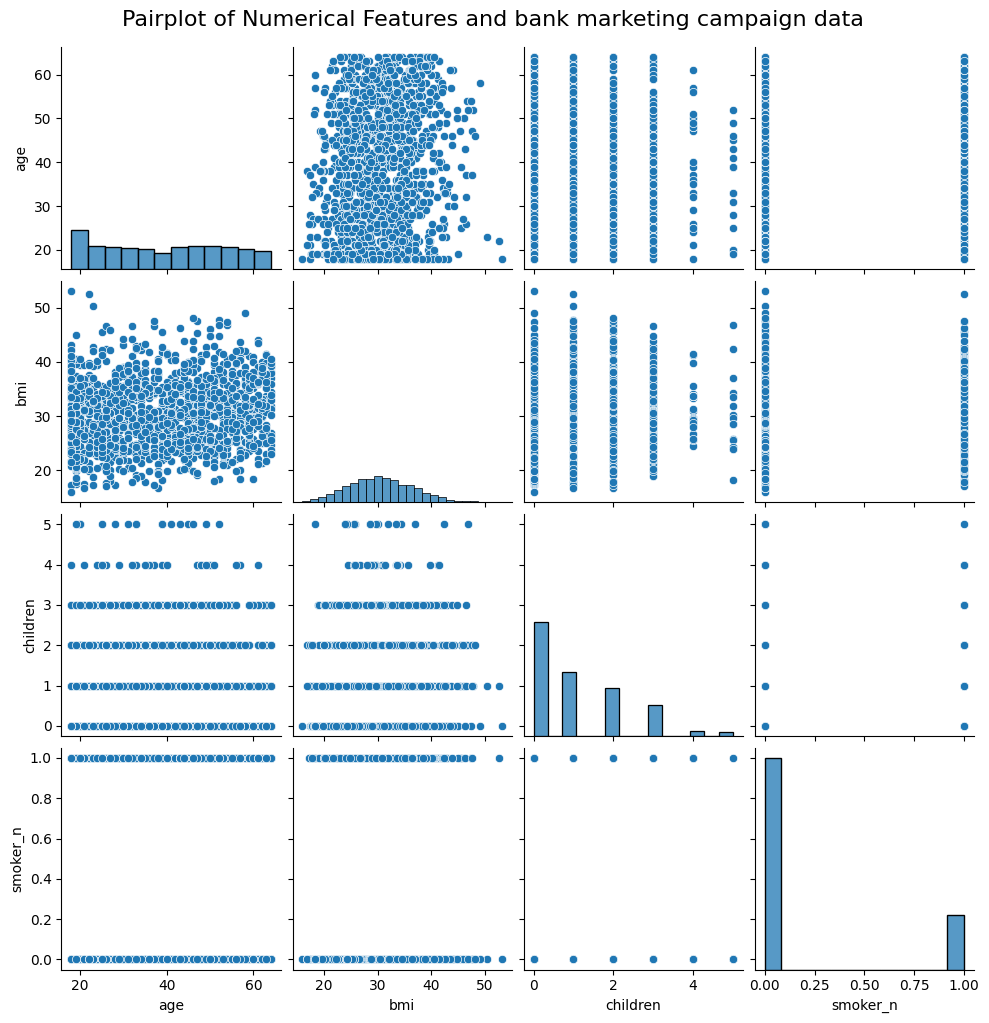

In [1335]:
# Create a pairplot
sns.pairplot(data = total_data[num_variables])
plt.suptitle("Pairplot of Numerical Features and bank marketing campaign data", y=1.02, fontsize=16)
plt.show()


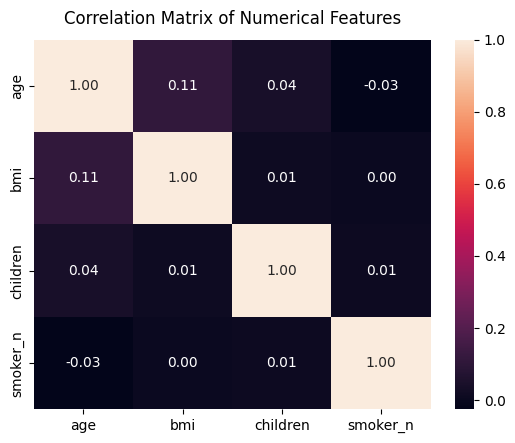

In [1336]:
# Create a heatmap
sns.heatmap(total_data[num_variables].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Matrix of Numerical Features", y=1.02)
plt.show()

In [1337]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercep (a): -1945.0447237717417
Coefficients (b1, b2): [11458.38000614 11359.0217263   2689.816833      85.02704092
 23051.36812442]


In [1339]:
y_pred = model.predict(X_test_scaled)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")   

MSE: 0.009150574110332004
R2 Score: 0.8045531086669286
